# Mental Health Detection Notebook

In [1]:
import zipfile
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import time
import uuid

####  1. Train Model 

In [2]:
# Step 1: Extract Dataset
zip_path = 'CK+48-20250625T074555Z-1-001.zip'
extract_dir = 'CK+48'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Dataset extracted.")


Dataset extracted.


In [3]:
# Step 2: Data Preprocessing
data_dir = 'CK+48/CK+48'
categories = [cat for cat in os.listdir(data_dir) if cat.lower() != 'ck+48']
print("Categories:", categories)

img_size = 48
data = []
labels = []

for category in categories:
    path = os.path.join(data_dir, category)
    label = categories.index(category)
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_size, img_size))
            data.append(img)
            labels.append(label)
        except:
            pass

data = np.array(data).reshape(-1, img_size, img_size, 1) / 255.0
labels = to_categorical(labels)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(f"Data shape: {X_train.shape}, Labels shape: {y_train.shape}")


Categories: ['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']
Data shape: (784, 48, 48, 1), Labels shape: (784, 7)


In [4]:
# Step 3: CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 839,047 (3.20 MB)

 Trainable params: 839,047 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Step 4: Train
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.2191 - loss: 1.8633 - val_accuracy: 0.4264 - val_loss: 1.6827
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.4442 - loss: 1.5939 - val_accuracy: 0.5330 - val_loss: 1.2770
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.6169 - loss: 1.2299 - val_accuracy: 0.6650 - val_loss: 0.9411
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7124 - loss: 0.8697 - val_accuracy: 0.7614 - val_loss: 0.6785
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.7864 - loss: 0.6630 - val_accuracy: 0.8731 - val_loss: 0.4841
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.8043 - loss: 0.5121 - val_accuracy: 0.8782 - val_loss: 0.4070
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.8587 - loss: 0.4281 - val_accuracy: 0.9086 - val_loss: 0.3452
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8768 - loss: 0.3432 - val_accuracy: 0.9188 -

#### 2. Save Model and History 

In [6]:
model.save('mental_health_expression_model.h5')
print("Model saved.")

# Save training history as numpy arrays
np.save('history_accuracy.npy', np.array(history.history['accuracy']))
np.save('history_val_accuracy.npy', np.array(history.history['val_accuracy']))
print("Training history saved.")


Model saved.
Training history saved.


#### 3. Import Model and History 

In [7]:
# Load saved model
model = load_model('mental_health_expression_model.h5')
print("Model loaded.")

Model loaded.


In [8]:
# Load history
acc = np.load('history_accuracy.npy')
val_acc = np.load('history_val_accuracy.npy')

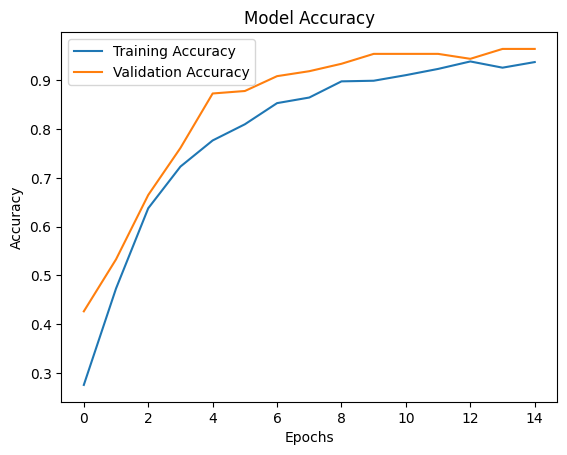

In [9]:

# Plot accuracy graph
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#### 4. Test (Real-time Video Analysis) 

In [10]:
# Step 4: Expression Prediction Function
def predict_expression(face_img):
    face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
    face_img = cv2.resize(face_img, (img_size, img_size))
    face_img = face_img.reshape(1, img_size, img_size, 1) / 255.0
    pred = model.predict(face_img, verbose=0)
    return categories[np.argmax(pred)]

In [11]:
# Step 5: Real-Time Video Analysis with Face Tracking
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

emotion_to_risk = {
    'angry': 'High Stress',
    'sad': 'Depression Risk',
    'happy': 'Low Risk',
    'surprise': 'Neutral',
    'fear': 'Anxiety Risk',
    'disgust': 'Stress Risk'
}

students = {}
risk_counts = {'High Stress': 0, 'Depression Risk': 0, 'Anxiety Risk': 0, 'Stress Risk': 0, 'Low Risk': 0, 'Neutral': 0, 'Unknown': 0}
next_student_id = 1

cap = cv2.VideoCapture(0)
start_time = time.time()
capture_duration = 30

while int(time.time() - start_time) < capture_duration:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        face_center = (x + w//2, y + h//2)

        matched_id = None
        for student_id, info in students.items():
            sx, sy, sw, sh = info['bbox']
            sx_center = sx + sw//2
            sy_center = sy + sh//2

            if abs(face_center[0] - sx_center) < 50 and abs(face_center[1] - sy_center) < 50:
                matched_id = student_id
                break

        if matched_id is None:
            matched_id = f"S{next_student_id}"
            next_student_id += 1
            students[matched_id] = {
                'bbox': (x, y, w, h),
                'emotion_counts': {e: 0 for e in categories},
                'risk_counts': {r: 0 for r in risk_counts.keys()},
                'total_frames': 0
            }

        students[matched_id]['bbox'] = (x, y, w, h)

        face_img = frame[y:y+h, x:x+w]
        emotion = predict_expression(face_img)
        risk = emotion_to_risk.get(emotion, 'Unknown')

        students[matched_id]['emotion_counts'][emotion] += 1
        students[matched_id]['risk_counts'][risk] += 1
        students[matched_id]['total_frames'] += 1

        risk_counts[risk] += 1

        color = (0, 255, 0) if risk == 'Low Risk' else (0, 0, 255)
        cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
        cv2.putText(frame, f'{emotion} | {risk} | {matched_id}', (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    cv2.imshow('Mental Health Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


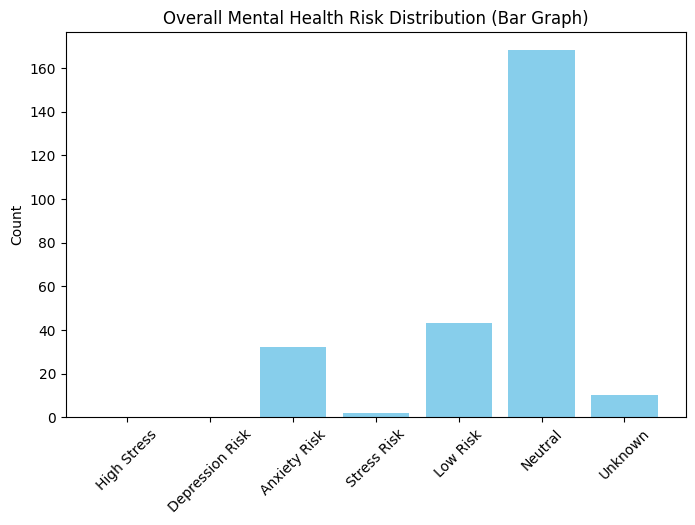

In [12]:
# Step 6: Bar Graph for Overall Risk Distribution
plt.figure(figsize=(8, 5))
plt.bar(risk_counts.keys(), risk_counts.values(), color='skyblue')
plt.title('Overall Mental Health Risk Distribution (Bar Graph)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Step 7: Generate Individual Student Reports, Pie Charts, and Stability per Student
report_dir = 'student_reports'
os.makedirs(report_dir, exist_ok=True)

for student_id, stats in students.items():
    total_frames = stats['total_frames']
    low_risk = stats['risk_counts'].get('Low Risk', 0)
    if total_frames == 0:
        stability = 'Unknown'
    elif low_risk / total_frames > 0.7:
        stability = 'Stable'
    elif low_risk / total_frames > 0.4:
        stability = 'Moderate'
    else:
        stability = 'Unstable'

    report_path = os.path.join(report_dir, f'{student_id}_report.txt')
    with open(report_path, 'w') as f:
        f.write(f'Student ID: {student_id}\n')
        f.write(f'Total Frames Detected: {total_frames}\n')
        f.write(f'Stability: {stability}\n\n')

        f.write('Emotion Counts:\n')
        for emotion, count in stats['emotion_counts'].items():
            f.write(f'{emotion}: {count}\n')

        f.write('\nMental Health Risk Counts:\n')
        for risk, count in stats['risk_counts'].items():
            f.write(f'{risk}: {count}\n')

    # Pie Chart for student
    plt.figure(figsize=(5, 5))
    plt.pie(stats['risk_counts'].values(), labels=stats['risk_counts'].keys(), autopct='%1.1f%%', startangle=140)
    plt.title(f'Mental Health Risk - {student_id} ({stability})')
    plt.savefig(os.path.join(report_dir, f'{student_id}_risk_piechart.png'))
    plt.close()

print(f"Reports, Pie Charts, and Stability saved in {report_dir}")

Reports, Pie Charts, and Stability saved in student_reports


In [14]:
# Step 8: Overall Classroom Stability Estimate
low_risk = risk_counts.get('Low Risk', 0)
total_faces = sum(risk_counts.values())
if total_faces == 0:
    stability = 'Unknown'
elif low_risk / total_faces > 0.7:
    stability = 'Stable'
elif low_risk / total_faces > 0.4:
    stability = 'Moderate'
else:
    stability = 'Unstable'

print(f"Overall Classroom Stability: {stability}")

Overall Classroom Stability: Unstable
